In [2]:
pwd

'c:\\Users\\bhavy\\Desktop\\backend\\notebook'

In [3]:
cd ../

c:\Users\bhavy\Desktop\backend


c:\Users\bhavy\Desktop\backend\learnsphere\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
pwd

'c:\\Users\\bhavy\\Desktop\\backend'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load datasets
df_mat = pd.read_csv("data/student-mat.csv", sep=";")
df_por = pd.read_csv("data/student-por.csv", sep=";")
# Merge based on the specified columns
merge_columns = ["school", "sex", "age", "address", "famsize", "Pstatus",
                 "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"]

# Merging datasets
df = pd.merge(df_mat, df_por, on=merge_columns, suffixes=('_mat', '_por'))

In [36]:
# List of numerical columns to average
numerical_cols = [
    "age", "Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", 
    "freetime", "goout", "Dalc", "Walc", "health", "absences", "G1", "G2", "G3"
]

# Taking the average for numerical columns
for col in numerical_cols:
    if f"{col}_mat" in df.columns and f"{col}_por" in df.columns:
        df[col] = (df[f"{col}_mat"] + df[f"{col}_por"]) / 2  # Compute average
        df[col] = df[col].round().astype(int)  # Round and convert to integer if necessary

# Handling categorical columns by keeping only one version (defaulting to "_mat")
categorical_cols = [col for col in df.columns if col.endswith("_mat") and col[:-4] not in numerical_cols]

for col in categorical_cols:
    base_col = col[:-4]  # Remove "_mat" suffix
    df[base_col] = df[col]  # Keep the `_mat` version

In [37]:
# Dropping original `_mat` and `_por` columns
df.drop(columns=[col for col in df.columns if col.endswith('_mat') or col.endswith('_por')], inplace=True)

In [38]:
# Define column name mappings
column_mappings = {
    "sex": "gender",
    "Pstatus": "parent_status",
    "Medu": "mother_edu",
    "Fedu": "father_edu",
    "Mjob": "mother_job",
    "Fjob": "father_job",
    "traveltime": "travel_time",
    "studytime": "study_time",
    "schoolsup": "school_support",
    "famsup": "family_support",
    "paid": "extra_paid_class",
    "activities": "extracurricular",
    "higher": "higher_edu",
    "romantic": "romantic_rel"
}

In [39]:
# Rename columns
df.rename(columns=column_mappings, inplace=True)

In [40]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [41]:
df.head()

,school,gender,age,address,famsize,parent_status,mother_edu,father_edu,mother_job,father_job,...,G1,G2,G3,guardian,school_support,family_support,extra_paid_class,extracurricular,higher_edu,romantic_rel
0,0,0,18,1,0,0,4,4,0,4,...,2,8,8,1,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,0,2,...,7,8,8,0,0,1,0,0,1,0
2,0,0,15,1,1,1,1,1,0,2,...,10,10,11,1,1,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,14,14,14,1,0,1,1,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,8,12,12,0,0,1,1,0,1,0


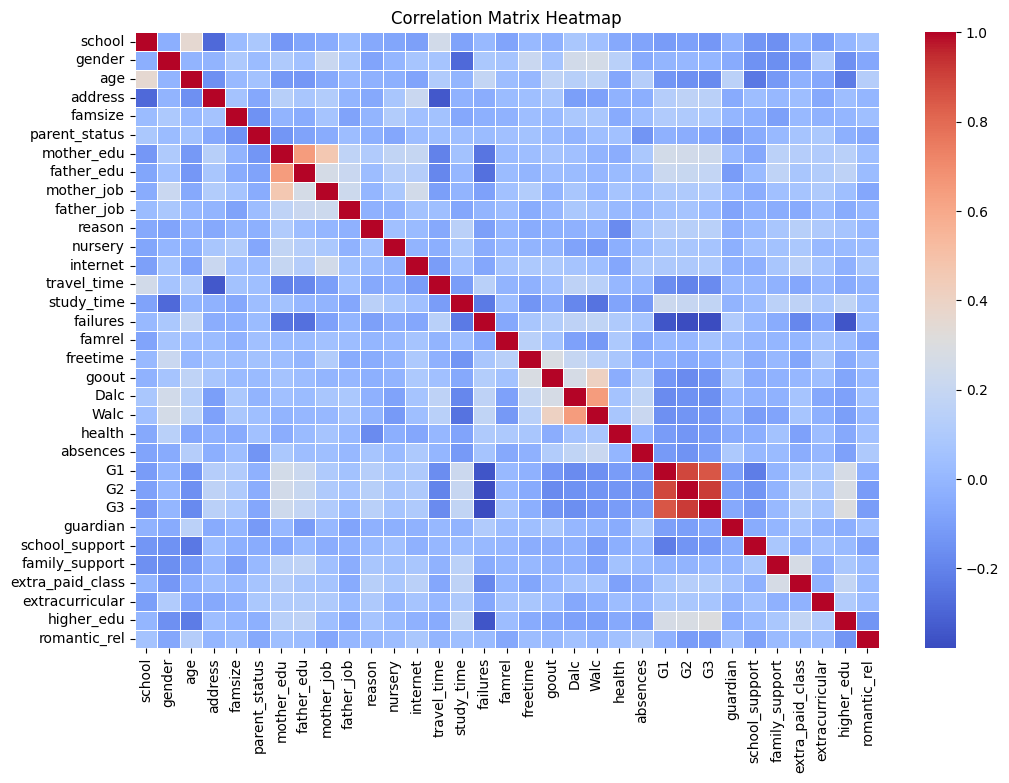

In [43]:
# Plot correlation matrix
data = df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
drop = ['school', 'address', 'famsize', 'reason', 'guardian', 'nursery','famrel', 'Dalc', 'Walc', 'health', 'age',
        'goout', 'failures', 'parent_status', 'mother_edu', 'father_edu', 'higher_edu', 'G1', 'G2', 'travel_time', 'study_time']
df = df.drop(columns=drop)

In [ ]:
# Save Dataset
df.to_csv("data/cleaned/student-final.csv", index=False)